# Stock Data Scrapper
This Python script scrapes the stock data from https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&index=9

Importing all the dependencies

In [1]:
import urllib.request as request
from bs4 import BeautifulSoup
import pandas as pd
from stockstats import StockDataFrame as Sdf
import time
import tqdm
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math
warnings.filterwarnings('ignore')

The URL of the page to be scraped

In [2]:
url = 'https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&index=9'

A function to get the html content

In [3]:
def get_HTML(url):
    response = request.Request(url,headers={'User-Agent': 'Mozilla/5.0'})
    content_obj = request.urlopen(response)
    response_code = content_obj.getcode()
    html_content = content_obj.read()
    return(html_content, response_code)   # return a tuple of html and response code

Let's try to grab the HTML and check if we have got the good response

In [4]:
html_content, response_code = get_HTML(url)
print('Response Code : ',response_code, end = '\n\n')
print(html_content[:500])

Response Code :  200

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost</title>\r\n<meta name="description" content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Mone'


A function to get all the data from rows and columns of the table in the page

In [5]:
def get_stock_data(html_content):
    soup_html_content = BeautifulSoup(html_content,features="lxml")
    table_element = soup_html_content.find('table', class_='tbldata14 bdrtpg')
    t_rows = [tr for tr in table_element.find_all('tr')]
    table_headers = [header.text.strip() for header in t_rows[0].find_all('th')]
    Data = list()
    Data.append(table_headers)
    for tr in t_rows[1::]:  # the firt row is header and We have already grabed that one
        data = list()
        tds = tr.find_all('td')
        for i, td in enumerate(tds):
            if(i==0):
                industry = td.text.split('\n')[0]
                data.append((industry))
            elif(i>=2):
                data.append(float(td.text.strip().replace(',','')))
            else:
                data.append(td.text.strip())
                
        Data.append(data)
    return(Data)

Get the stock data using the function we just defined

In [6]:
stock_data = get_stock_data(html_content)
stock_df = pd.DataFrame(stock_data[1::], columns=stock_data[0])
stock_df.index = [i for i in range(1, len(stock_df)+1)]

Let's have a look at the stock data we have got

In [7]:
stock_df

,Company Name,Industry,LastPrice,Change,%Chg,Mkt Cap(Rs cr)
1,Adani Ports,Transport Infrastructure,256.40,-1.95,-0.75,52094.12
2,Asian Paints,Paints,1742.95,141.75,8.85,167183.38
3,Axis Bank,Bank - Private,428.15,-0.10,-0.02,120800.02
4,Bajaj Auto,Automobile - 2 & 3 Wheelers,2242.30,75.70,3.49,64884.77
5,Bajaj Finance,Finance - NBFC,2951.90,205.80,7.49,177612.60
6,Bajaj Finserv,Finance - Investment,6233.05,447.55,7.74,99191.07
7,Bharti Airtel,Telecommunication - Service Provider,462.65,17.90,4.02,252401.36
8,Bharti Infratel,Telecommunication - Equipment,148.15,24.10,19.43,27401.95
9,BPCL,Refineries,317.85,17.60,5.86,68949.70
10,Britannia,Consumer Food,2467.80,149.65,6.46,59342.77


Defining another function to get just the Chg values

In [8]:
def get_Chg(url):
    html_content, _ = get_HTML(url)
    soup_html_content = BeautifulSoup(html_content,features="lxml")
    table_element = soup_html_content.find('table', class_='tbldata14 bdrtpg')
    t_rows = [tr for tr in table_element.find_all('tr')]
    Chg_data = list()
    for tr in t_rows[1::]:  # the firt row is header and We have already grabed that one
        tds = tr.find_all('td')
        for i, td in enumerate(tds):
            if(i==4):
                Chg_data.append(td.text.strip())
    return(Chg_data)

Defining a function to get alert if the change in the Chg values of respective company crosses change_for_alert%<br>
Default parameters:<br>
    sleep time = 3 -- time to waiting for next iteration<br>
    total duration = 1800 or 30 mins -- total time till when the script will be running<br>
    change_for_alert = 2  -- the differene in values of Chg that will make the script<br>
Other parameter:url
       

In [9]:
def get_alert(url, sleep_time = 30, total_duration = 600, change_for_alert = 2):
    initial_Chg = [float(Chg) for Chg in get_Chg(url)]
    changes_found = False
    for _ in tqdm.tqdm(range(total_duration//sleep_time)):
        time.sleep(sleep_time)
        current_Chg = [float(Chg) for Chg in get_Chg(url)]
        for i, (init_Chg, curr_Chg) in enumerate(zip(initial_Chg, current_Chg)):
            if(abs(init_Chg - curr_Chg) >= change_for_alert):
                print('Alert : Chg of '+ stock_data[i][0] + ' has difference of '+ str(init_Chg - curr_Chg) + ' !') 
                changes_found = True
    if(not changes_found):
        print('No sufficient changes found!')

Let's run the function and check if we get any alert

In [10]:
get_alert(url)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:28<00:00, 31.03s/it]


No sufficient changes found!


Note : As It's not trading hours, the Chg value isn't changing

Creating a function to get sample close data as We don't have enough close data to compute MACD<br>
Let's create data for 12 days, as it is the minimum requirement for MACD

In [11]:
def get_sample_close_data(close_data, n_days=12):
    d_close_data = list()
    for data in close_data:
        randvalues = np.random.random_sample(n_days)
        c_data = np.array(data + (randvalues/50)*data)
        d_close_data.append(c_data)
    return(np.array(d_close_data))
sample_close_values = pd.DataFrame(get_sample_close_data(stock_df['LastPrice'].transpose()), index = stock_df['Company Name'], columns = ['close']*12) 

Let's have a look at the sample data

In [12]:
sample_close_values.head()

,close,close,close,close,close,close,close,close,close,close,close,close
Company Name,,,,,,,,,,,,
Adani Ports,257.816473,259.345247,256.565002,260.037002,260.361255,256.592588,260.746964,257.287661,261.091356,259.399990,259.625749,259.022109
Asian Paints,1762.318833,1750.682310,1767.584988,1771.358820,1774.611087,1768.773880,1748.837230,1745.197878,1754.389092,1776.735196,1775.723461,1756.226948
Axis Bank,431.416158,429.147657,429.818698,429.818446,432.099170,429.324432,435.765563,430.345327,432.141970,430.547018,435.905225,429.063174
Bajaj Auto,2277.016739,2264.404804,2284.234995,2274.029944,2286.988920,2284.358998,2253.042050,2261.532720,2280.657714,2279.325394,2263.346751,2262.349250
Bajaj Finance,2973.137365,2998.604046,2958.830494,2954.069278,2982.832245,2965.972348,2969.426010,2964.575519,2962.056047,3006.709054,2986.710330,2965.026518


Function for computing MACD, MACDS and MACDH

In [13]:
def macd(sample_close_values):
    n_com = len(sample_close_values)
    x = range(1, n_com)
    com_names = list()
    MACDs = list()
    MACDSs = list()
    MACDHs = list()
    
    for i in range(1, n_com):  
        stock = pd.DataFrame(sample_close_values.loc[sample_close_values.index[i]])
        c_name = stock.columns[0]
        stock.columns = ['close']
        stock.index = range(1, len(stock)+1)
        stock =  Sdf.retype(stock)
        macd = stock['macd']   # MACD
        macds = stock['macds'] # MACD signal line
        macdh = stock['macdh'] # MACD histogram
        com_names.append(c_name)
        MACDs.append(macd)
        MACDSs.append(macds)
        MACDHs.append(macdh)
    return (com_names, MACDs, MACDSs, MACDHs)

Geting all the MACD data using the created function

In [14]:
C_names, MACDs, MACDSs, MACDHs = macd(sample_close_values)

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Beha

Function for ploting the MACD data

In [15]:
def plot_MACD(C_names, MACDs, MACDSs, MACDHs, num_com = 4):
    n_cols = 2
    n_rows = math.ceil(num_com/n_cols)
    fig = plt.figure(figsize=(n_rows*10,n_cols*10))
    ax = fig.subplots(nrows = n_rows, ncols = n_cols)
    count = 0
    for row in ax:
        for col in row:
            col.plot(MACDs[count],label='MACD')
            col.plot(MACDSs[count], '-',label='MACD Signal')
            col.plot(MACDHs[count], '-.',label='MACD Histogram')    
            col.legend()
            col.set_title(C_names[count])
            col.set_xlabel('Days')
            col.set_ylabel('MACD')
            count +=1
            if(count == num_com):
                fig.show()
                return
    

Let's plot the MACDs of first 6 companies

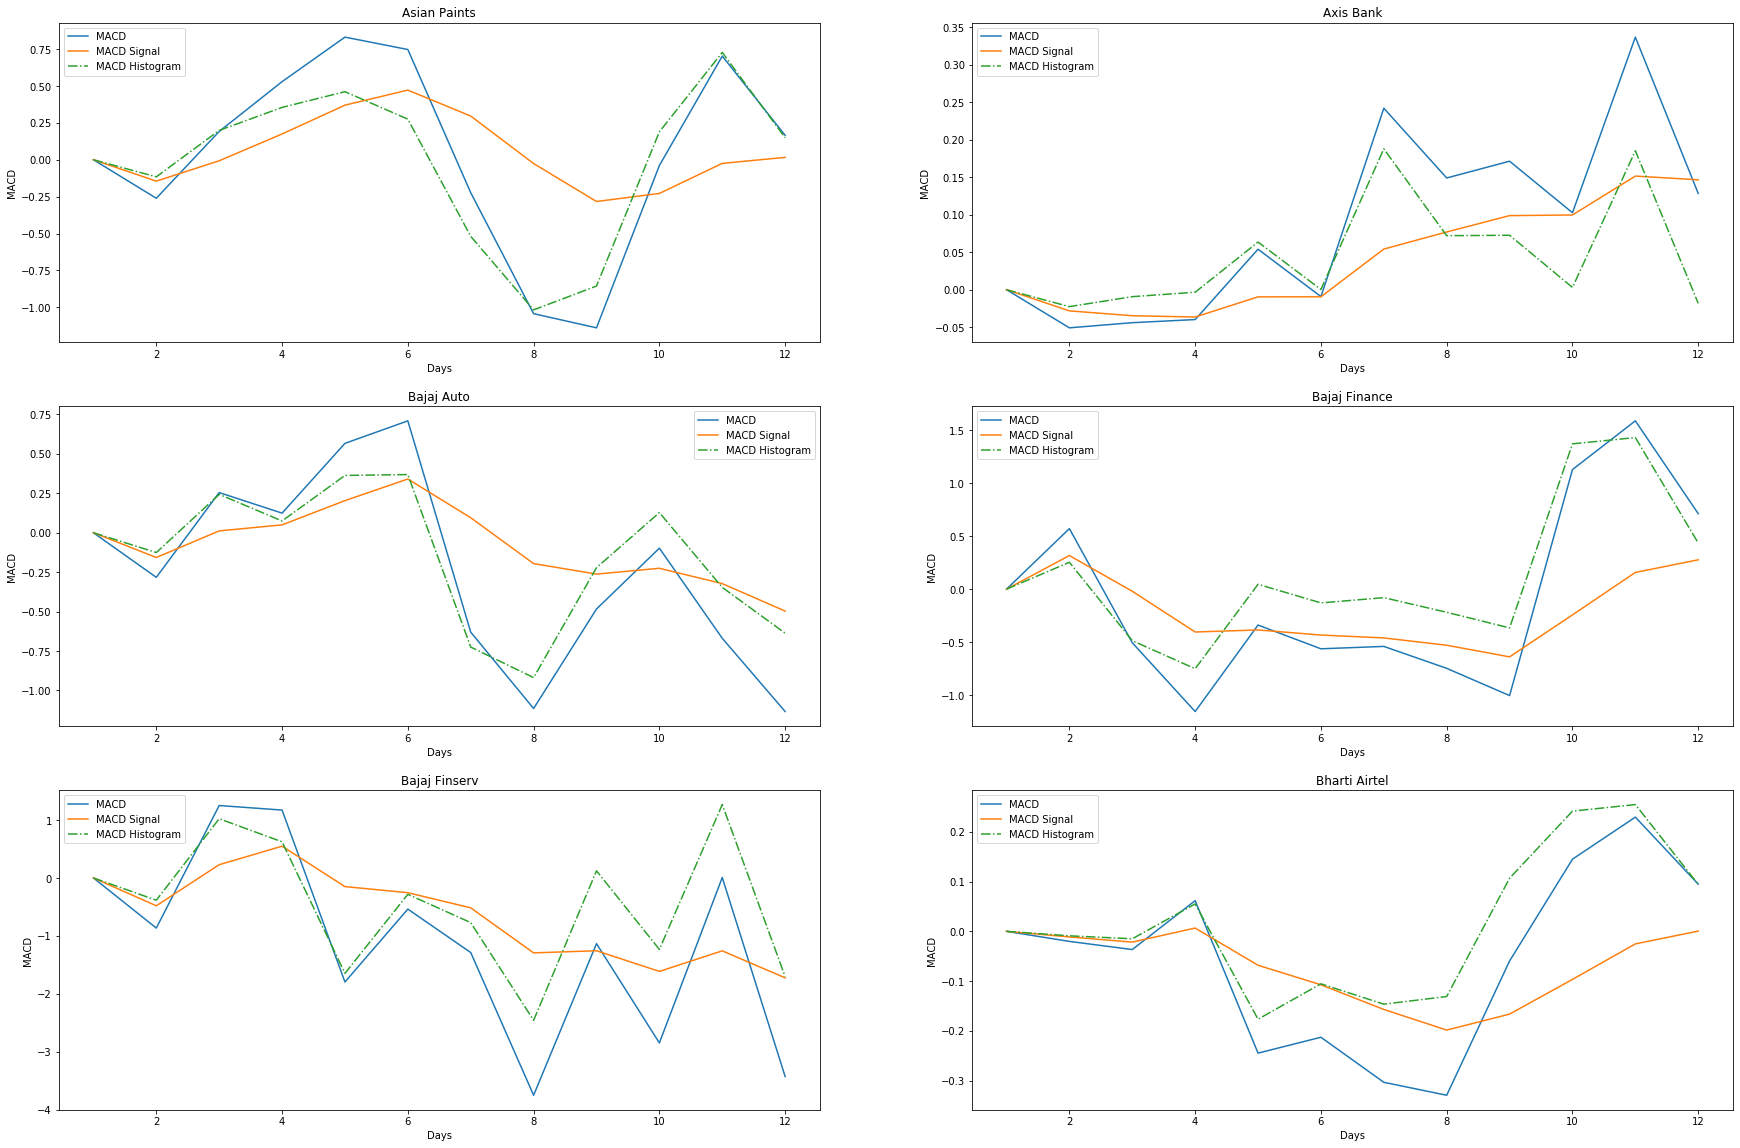

In [16]:
plot_MACD(C_names, MACDs, MACDSs, MACDHs, num_com = 6)